In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6zXEjB2FO9FNiGK78uy1QX0xzGW5fx7CDwtzaq00HbGOK6UOK7okg
Mounted at /content/drive


In [ ]:
import librosa
from librosa import display

!unzip drive/MyDrive/Rawdata.zip




Archive:  drive/MyDrive/Rawdata.zip
  inflating: Rawdata/03-01-01-01-01-01-01.wav  
  inflating: Rawdata/03-01-01-01-01-01-02.wav  
  inflating: Rawdata/03-01-01-01-01-01-03.wav  
  inflating: Rawdata/03-01-01-01-01-01-04.wav  
  inflating: Rawdata/03-01-01-01-01-01-05.wav  
  inflating: Rawdata/03-01-01-01-01-01-06.wav  
  inflating: Rawdata/03-01-01-01-01-01-07.wav  
  inflating: Rawdata/03-01-01-01-01-01-08.wav  
  inflating: Rawdata/03-01-01-01-01-01-09.wav  
  inflating: Rawdata/03-01-01-01-01-01-10.wav  
  inflating: Rawdata/03-01-01-01-01-01-11.wav  
  inflating: Rawdata/03-01-01-01-01-01-12.wav  
  inflating: Rawdata/03-01-01-01-01-01-13.wav  
  inflating: Rawdata/03-01-01-01-01-01-14.wav  
  inflating: Rawdata/03-01-01-01-01-01-15.wav  
  inflating: Rawdata/03-01-01-01-01-01-16.wav  
  inflating: Rawdata/03-01-01-01-01-01-17.wav  
  inflating: Rawdata/03-01-01-01-01-01-18.wav  
  inflating: Rawdata/03-01-01-01-01-01-19.wav  
  inflating: Rawdata/03-01-01-01-01-01-20.wav  
  in

In [ ]:
data, sampling_rate = librosa.load('/content/Rawdata/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


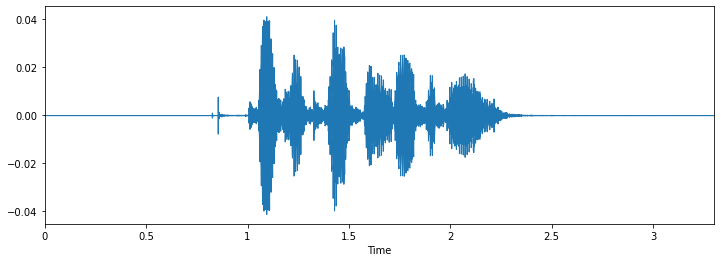

In [ ]:
% pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
import time
import os
path = '/content/Rawdata'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 156.15121340751648 seconds ---


In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((1440, 40), (1440,))

In [ ]:
# Saving joblib files to not load them again with the loop above

import joblib

import joblib
X = joblib.load('/content/drive/MyDrive/Ravtess_Model/X.joblib')
y = joblib.load('/content/drive/MyDrive/Ravtess_Model/y.joblib')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


In [ ]:

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       192
           1       0.62      0.60      0.61       123
           2       0.61      0.61      0.61       264
           3       0.68      0.66      0.67       275
           4       0.70      0.68      0.69       252
           5       0.62      0.64      0.63       241
           6       0.70      0.68      0.69       197
           7       0.57      0.59      0.58       190

    accuracy                           0.66      1734
   macro avg       0.66      0.66      0.66      1734
weighted avg       0.66      0.66      0.66      1734



In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1734, 40, 1))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_4 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_5 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)          

In [ ]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
220/220 [==============================] - 5s 17ms/step - loss: 4.6871 - accuracy: 0.1493 - val_loss: 1.9629 - val_accuracy: 0.2895
Epoch 2/200
220/220 [==============================] - 3s 15ms/step - loss: 2.7698 - accuracy: 0.2552 - val_loss: 1.4979 - val_accuracy: 0.4556
Epoch 3/200
220/220 [==============================] - 3s 15ms/step - loss: 2.1125 - accuracy: 0.3410 - val_loss: 1.3469 - val_accuracy: 0.5317
Epoch 4/200
220/220 [==============================] - 3s 15ms/step - loss: 1.7216 - accuracy: 0.4326 - val_loss: 1.2681 - val_accuracy: 0.5681
Epoch 5/200
220/220 [==============================] - 3s 15ms/step - loss: 1.5612 - accuracy: 0.4760 - val_loss: 1.1722 - val_accuracy: 0.5830
Epoch 6/200
220/220 [==============================] - 3s 15ms/step - loss: 1.3991 - accuracy: 0.5149 - val_loss: 1.1236 - val_accuracy: 0.6032
Epoch 7/200
220/220 [==============================] - 3s 15ms/step - loss: 1.3100 - accuracy: 0.5481 - val_loss: 1.0768 - val_accuracy:

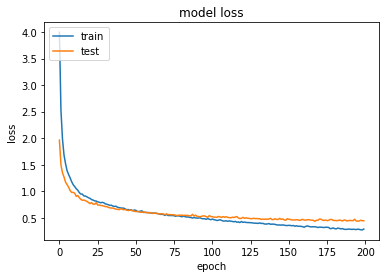

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

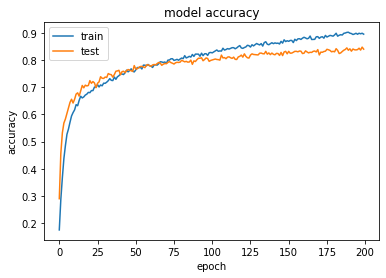

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

predictions = model.predict_classes(x_testcnn)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 3, 3, ..., 1, 6, 2])

In [ ]:
y_test

array([3, 3, 3, ..., 1, 6, 2], dtype=int32)

In [ ]:

new_Ytest = y_test.astype(int)

In [ ]:

new_Ytest

array([3, 3, 3, ..., 1, 6, 2])

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       192
           1       0.68      0.86      0.76       123
           2       0.88      0.76      0.82       264
           3       0.88      0.78      0.83       275
           4       0.88      0.90      0.89       252
           5       0.75      0.90      0.82       241
           6       0.82      0.85      0.84       197
           7       0.86      0.83      0.84       190

    accuracy                           0.84      1734
   macro avg       0.84      0.84      0.84      1734
weighted avg       0.85      0.84      0.84      1734



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[168  11   0   7   2   3   1   0]
 [  2 106   6   2   0   5   2   0]
 [  2  17 201   1  13  14   8   8]
 [  3   8   4 214   5  28   8   5]
 [  0   2   3   2 227   7   8   3]
 [  0   2   4  11   4 216   1   3]
 [  0   7   3   2   4   6 168   7]
 [  0   2   7   3   4   9   8 157]]


In [ ]:
model.save('testing10_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('testing10_model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_4 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_5 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)          

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

55/55 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8403
Restored model, accuracy: 84.03%
